### Modeling Training

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
#modelling imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [26]:
df=pd.read_csv('data/stud.csv')

In [27]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


### creating X and Y

In [28]:
y=df['math_score']

In [29]:
X=df.drop(columns='math_score',axis=1)

In [30]:
X.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [16]:
y.head(5)

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

### CHECKING THE CATEGORICAL VARIABLES

In [19]:
print("Categories in gender", end=" ")
print(df['gender'].unique())

print("Categories in race and ethnicity", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental education", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch", end=" ")
print(df['lunch'].unique())

Categories in gender ['female' 'male']
Categories in race and ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch ['standard' 'free/reduced']


With all these categories, one can perform one hot encoding. Afterwards, one will apply standardization

In [31]:
# seperating numerical features from categorical features.
num_feature=X.select_dtypes(exclude=object).columns
cat_feature=X.select_dtypes(include=object).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer= StandardScaler()
OHE=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder", OHE, cat_feature),
        ("StandardScalar", numeric_transformer, num_feature)
    ]
)



In [32]:
X=preprocessor.fit_transform(X)

In [34]:
X.shape

(1000, 19)

In [35]:
from sklearn.model_selection import train_test_split

### Creating train test split

In [36]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=45)
X_train.shape, X_test.shape

((700, 19), (300, 19))

### Creating function to evaluate model

In [37]:
def evaluate_model(true, predicted):
    mse=mean_squared_error(true, predicted)
    mae=mean_absolute_error(true, predicted)
    rmse=np.sqrt(mean_squared_error(true, predicted))
    r2_square=r2_score(true, predicted)
    return mse, mae, rmse, r2_square

### Creating the Model for training

In [43]:
models={
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}

model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)

    #making predictions
    y_train_predict=model.predict(X_train)
    y_test_predict=model.predict(X_test)

    # evaluate the prediction
    model_train_mse, model_train_mae, model_train_rmse, model_train_r2=evaluate_model(y_train, y_train_predict)

    model_test_mse, model_test_mae, model_test_rmse, model_test_r2=evaluate_model(y_test, y_test_predict)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3357
- Mean Absolute Error: 4.2350
- Mean squared Error: 28.4697
- R2 Score: 0.8801
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4646
- Mean Absolute Error: 4.3877
- Mean squared Error: 28.4697
- R2 Score: 0.8569


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4858
- Mean Absolute Error: 5.0815
- Mean squared Error: 42.0656
- R2 Score: 0.8229
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.7927
- Mean Absolute Error: 5.4762
- Mean squared Error: 42.0656
- R2 Score: 0.7789


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2868
- Mean Absolute Error: 4.1747
- Mean squared Error: 27.9505
- R2 Score: 0.8823
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4551
- Mean Absolute Error: 4.4105
- Mean squared Error: 27.9505
- R2 

### Result

In [44]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.857377
0,LinearRegression,0.856878
7,CatBoostRegressor,0.824007
5,RandomForestRegressor,0.802967
8,AdaBoostRegressor,0.782569
1,Lasso,0.778854
6,XGBRegressor,0.769385
3,K-Neighbors Regressor,0.760031
4,DecisionTreeRegressor,0.659679


In [45]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.69


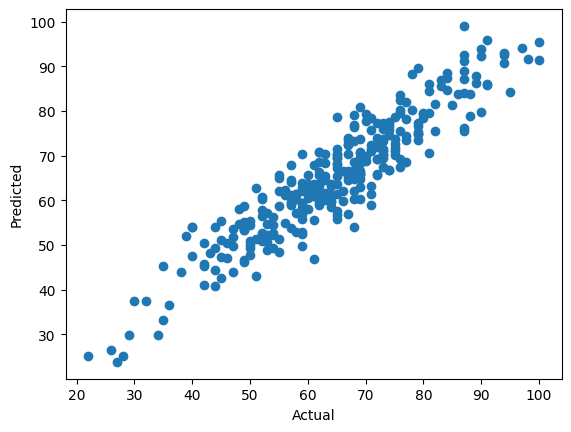

In [48]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

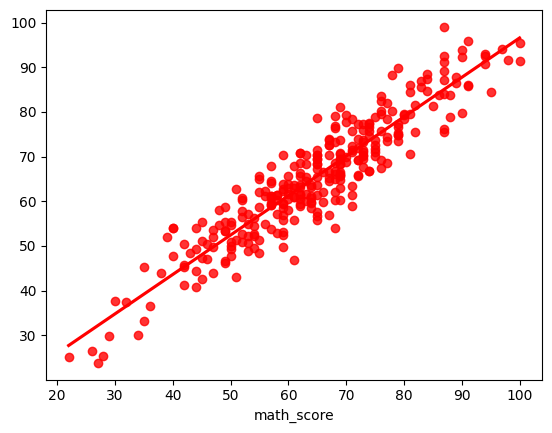

In [49]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [50]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
726,65,70.3125,-5.3125
243,59,58.3750,0.6250
342,69,64.7500,4.2500
976,60,61.6875,-1.6875
919,91,95.8750,-4.8750
...,...,...,...
701,57,64.1250,-7.1250
491,64,60.7500,3.2500
48,57,61.0625,-4.0625
651,68,66.1875,1.8125
